In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [6]:
preco = ctrl.Antecedent(np.arange(40000, 100000, 1), 'preço')
consumo = ctrl.Antecedent(np.arange(11, 18, 1), 'consumo')

In [7]:
beneficio = ctrl.Consequent(np.arange(0, 11, 0.5), 'beneficio')

In [8]:
preco.automf(number=3, names=['baixo', 'medio', 'alto'])
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])

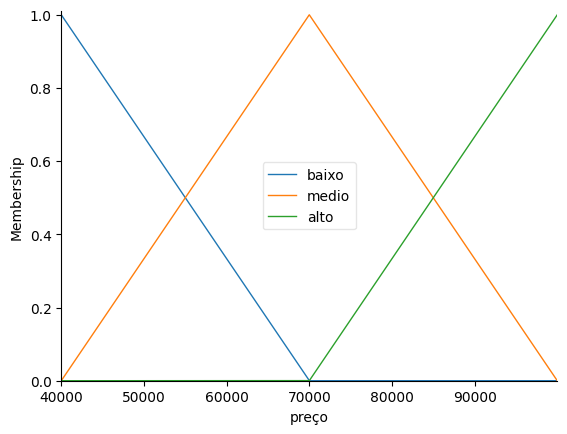

In [10]:
preco.view()

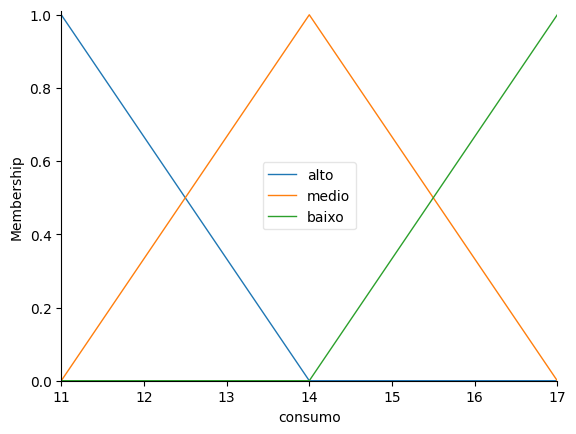

In [11]:
consumo.view()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


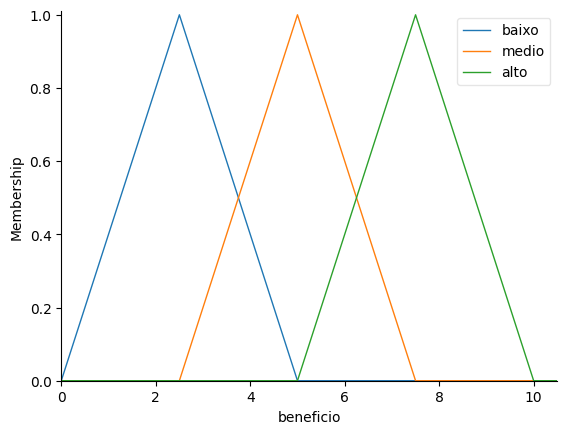

In [12]:
beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0, 2.5, 5])
beneficio['medio'] = fuzz.trimf(beneficio.universe, [2.5, 5, 7.5])
beneficio['alto'] = fuzz.trimf(beneficio.universe, [5, 7.5, 10])

beneficio.view()

In [15]:
regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], beneficio['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['medio'], beneficio['medio'])
regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])


In [16]:
recomendacao_compra = ctrl.ControlSystem([regra1, regra2, regra3, regra4,
                                          regra5, regra6, regra7, regra8, regra9])

In [23]:
recomendacao = ctrl.ControlSystemSimulation(recomendacao_compra)

In [24]:
recomendacao.input['preço'] = 50000
recomendacao.input['consumo'] = 16

recomendacao.compute()

6.25


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


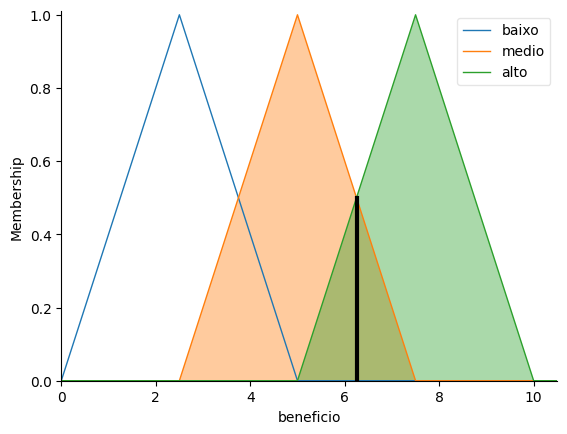

In [26]:
print(recomendacao.output['beneficio'])
beneficio.view(sim = recomendacao)